In [2]:
## Import Packages
import numpy as np
import _pickle as pk
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
%matplotlib inline

In [3]:
land_mask = np.isnan(np.mean(pk.load(\
    open('Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))
land_valid = np.isfinite(np.mean(pk.load(\
    open('Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))

In [4]:
exps = ['iga-sst-1xco2','iga-sst-4xco2','idj-sst-4xco2',\
        'iga-dsst-4xco2','5pi-sst-1xco2','5a4-sst-4xco2','5pi-dsst-4xco2']

Source = 'Data/CanESM5_p2/Custom/Climatology/'
SST = dict()
for i in range(len(exps)):
    SST[exps[i]] = pk.load(open(Source+'CanESM5_p2_'+exps[i]+'_SST_Climo.pi','rb'))
    SST[exps[i]] 

In [5]:
dSST = dict()
dSST['2SST'] = SST['idj-sst-4xco2']-SST['iga-sst-1xco2']
dSST['2SSTu'] = SST['iga-dsst-4xco2']-SST['iga-sst-1xco2']
dSST['5SST'] = SST['5a4-sst-4xco2']-SST['5pi-sst-1xco2']
dSST['5SSTu'] = SST['5pi-dsst-4xco2']-SST['5pi-sst-1xco2']

In [6]:
#define grid and weights
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [7]:
plot = dict()
gam = dict()
for exp in dSST.keys():
    plot[exp] = np.nanmean(dSST[exp],axis=0)
    gam[exp] = np.average(plot[exp][land_valid],weights=coslat[land_valid])
    plot[exp] = np.concatenate((plot[exp][:,64:],plot[exp][:,0:64]),axis=1)
    plot[exp],lon_cyc = add_cyclic_point(plot[exp],lon)

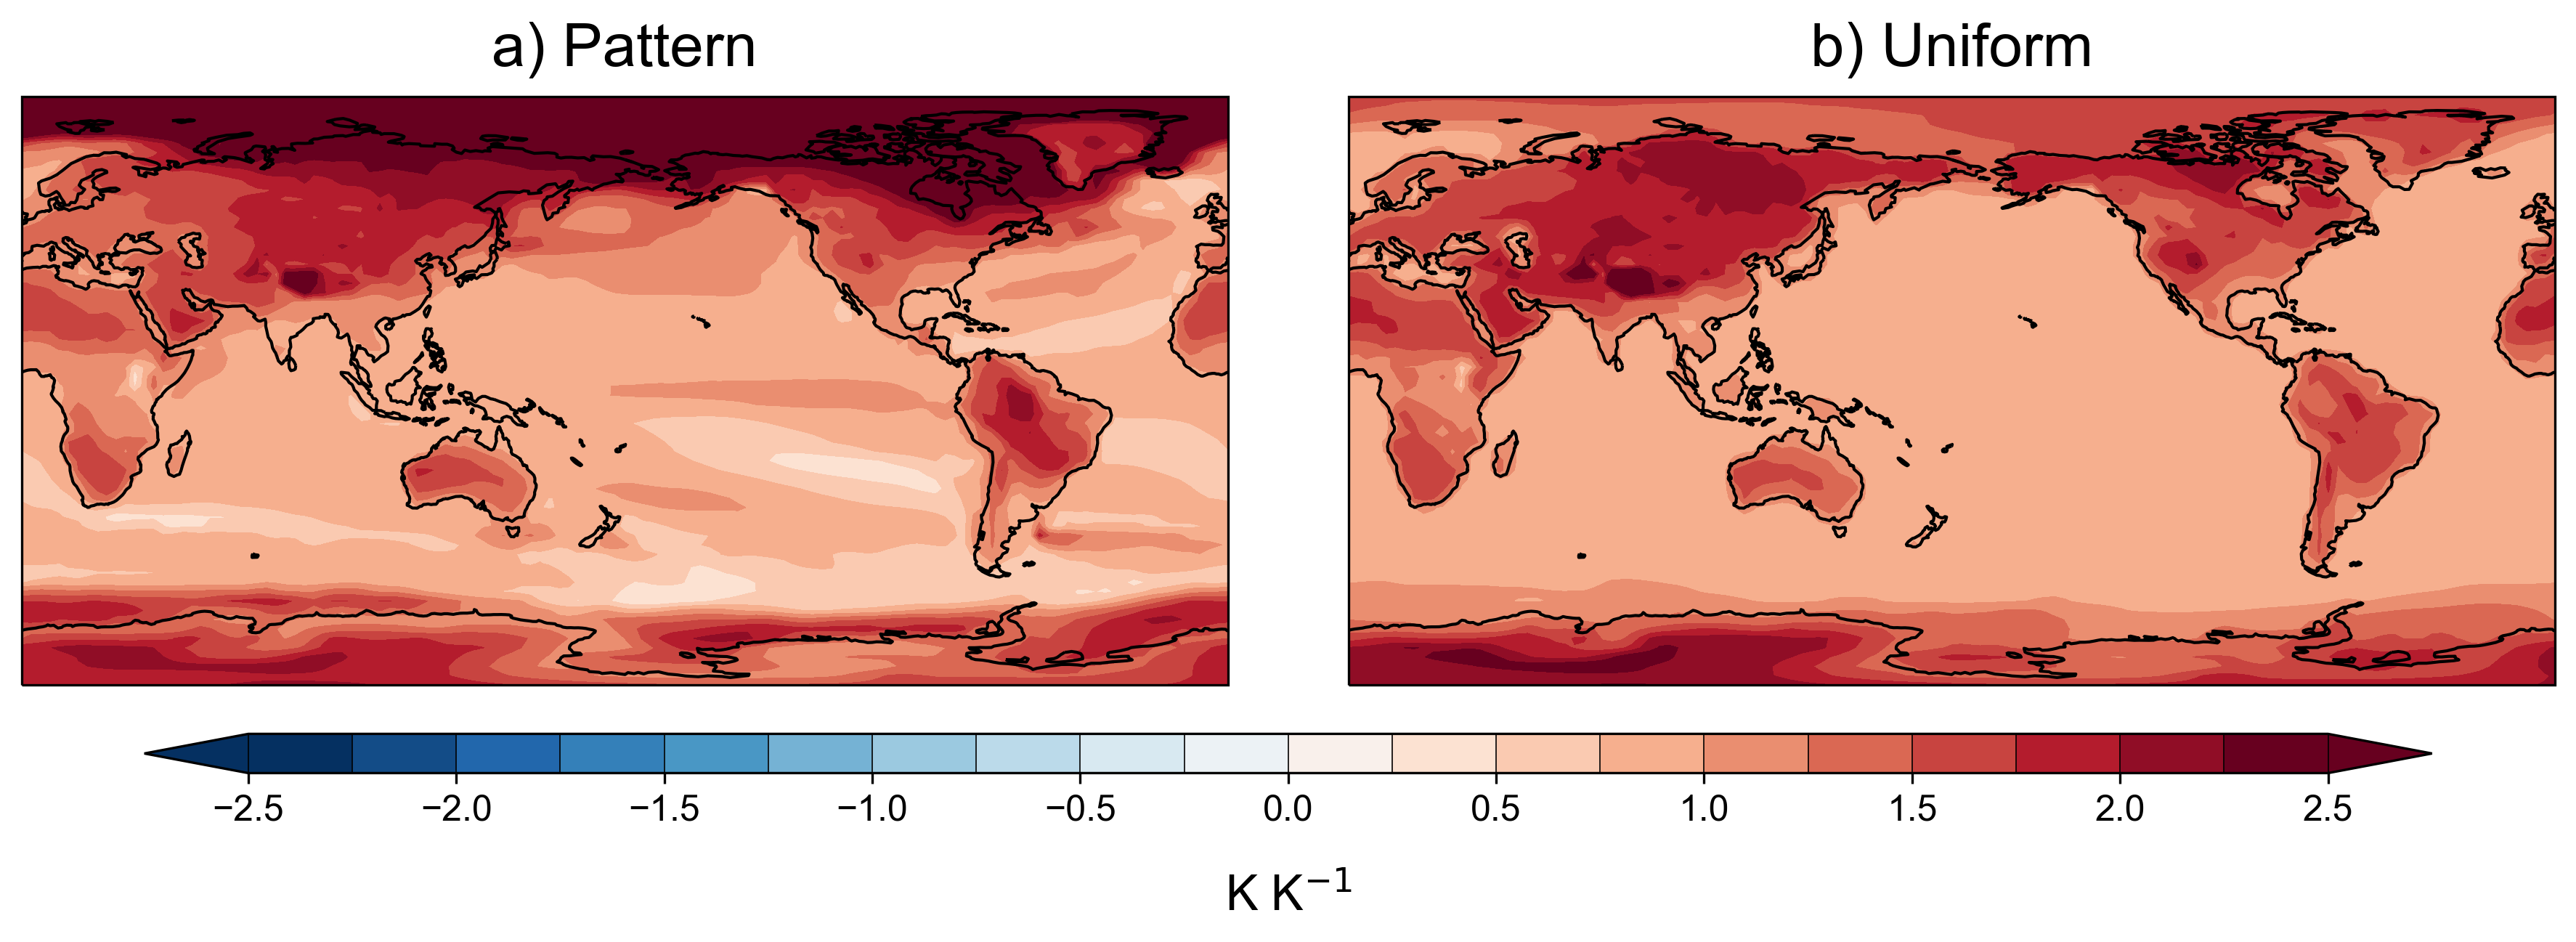

In [18]:
cmap = plt.cm.RdBu_r
bounds_diff = np.arange(-2.5,2.6,0.25)
bounds_diff_ticks = np.arange(-2.5,2.6,0.5)
norm_diff = mpl.colors.BoundaryNorm(bounds_diff, cmap.N)

exps = list(dSST.keys())
fig = plt.figure(figsize=(15,4.5),dpi=300)
#plt.suptitle('CanESM5 Prescribed SST TS Response',fontsize=35,y=0.9)
#gs = gridspec.GridSpec(3,2, width_ratios=[0.6,1],height_ratios=[1,1,1])


ax = plt.subplot(121,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('a) Pattern',fontsize=20,pad=10)
im = ax.contourf(lon_cyc,lat,plot[exps[2]]/gam[exps[2]],\
                 bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax.coastlines()
#plt.colorbar(im,ticks=bounds_diff_ticks,drawedges=True,label='K K$^{-1}$',shrink=0.7)

ax1 = plt.subplot(122,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('b) Uniform',fontsize=20,pad=10)
im1 = ax1.contourf(lon_cyc,lat,plot[exps[3]]/gam[exps[3]],\
                   bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax1.coastlines()
#plt.colorbar(im1,ticks=bounds_diff_ticks,drawedges=True,label='K K$^{-1}$',shrink=0.7)

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.1625, 0.15, 0.7, 0.04])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal',\
            ticks=bounds_diff_ticks,drawedges=True)
cbar.ax.tick_params(labelsize='large')
cbar.set_label('K K$^{-1}$',labelpad=15,fontsize=16)

plt.subplots_adjust(wspace=0.1)

plt.savefig('CanESM5_Custom_dSST.eps',bbox_inches='tight')